# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

# Import dataset

In [3]:
df = pd.read_csv('./data/NF-UNSW-NB15.csv')

https://staff.itee.uq.edu.au/marius/NIDS_datasets/#RA5

# Basic Information of dataset

In [4]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [5]:
df.shape

(1623118, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623118 entries, 0 to 1623117
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1623118 non-null  object 
 1   L4_SRC_PORT                 1623118 non-null  int64  
 2   IPV4_DST_ADDR               1623118 non-null  object 
 3   L4_DST_PORT                 1623118 non-null  int64  
 4   PROTOCOL                    1623118 non-null  int64  
 5   L7_PROTO                    1623118 non-null  float64
 6   IN_BYTES                    1623118 non-null  int64  
 7   OUT_BYTES                   1623118 non-null  int64  
 8   IN_PKTS                     1623118 non-null  int64  
 9   OUT_PKTS                    1623118 non-null  int64  
 10  TCP_FLAGS                   1623118 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1623118 non-null  int64  
 12  Label                       1623118 non-null  int64  
 1

In [7]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [8]:
df.isna().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64

In [9]:
# Function to convert IP address to four numerical features (octets)
def ip_to_numeric(ip):
    return list(map(int, ip.split('.')))

# Apply the function to the IP address column
df[['SRC_IP_Octet1', 'SRC_IP_Octet2', 'SRC_IP_Octet3', 'SRC_IP_Octet4']] = df['IPV4_SRC_ADDR'].apply(ip_to_numeric).apply(pd.Series)
df[['DST_IP_Octet1', 'DST_IP_Octet2', 'DST_IP_Octet3', 'DST_IP_Octet4']] = df['IPV4_DST_ADDR'].apply(ip_to_numeric).apply(pd.Series)

In [10]:
df = df.drop(columns=['IPV4_SRC_ADDR'])
df = df.drop(columns=['IPV4_DST_ADDR'])

In [11]:
df.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack', 'SRC_IP_Octet1',
       'SRC_IP_Octet2', 'SRC_IP_Octet3', 'SRC_IP_Octet4', 'DST_IP_Octet1',
       'DST_IP_Octet2', 'DST_IP_Octet3', 'DST_IP_Octet4'],
      dtype='object')

In [12]:
# unique types in the column
df['Attack'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis'],
      dtype=object)

In [13]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to 'Attack' column
df['Attack_Encoded'] = le.fit_transform(df['Attack'])

In [17]:
df = df.drop(columns=['Attack'])

In [18]:
# View the first few rows of the updated dataframe
df.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label', 'SRC_IP_Octet1', 'SRC_IP_Octet2',
       'SRC_IP_Octet3', 'SRC_IP_Octet4', 'DST_IP_Octet1', 'DST_IP_Octet2',
       'DST_IP_Octet3', 'DST_IP_Octet4', 'Attack_Encoded'],
      dtype='object')

<Axes: >

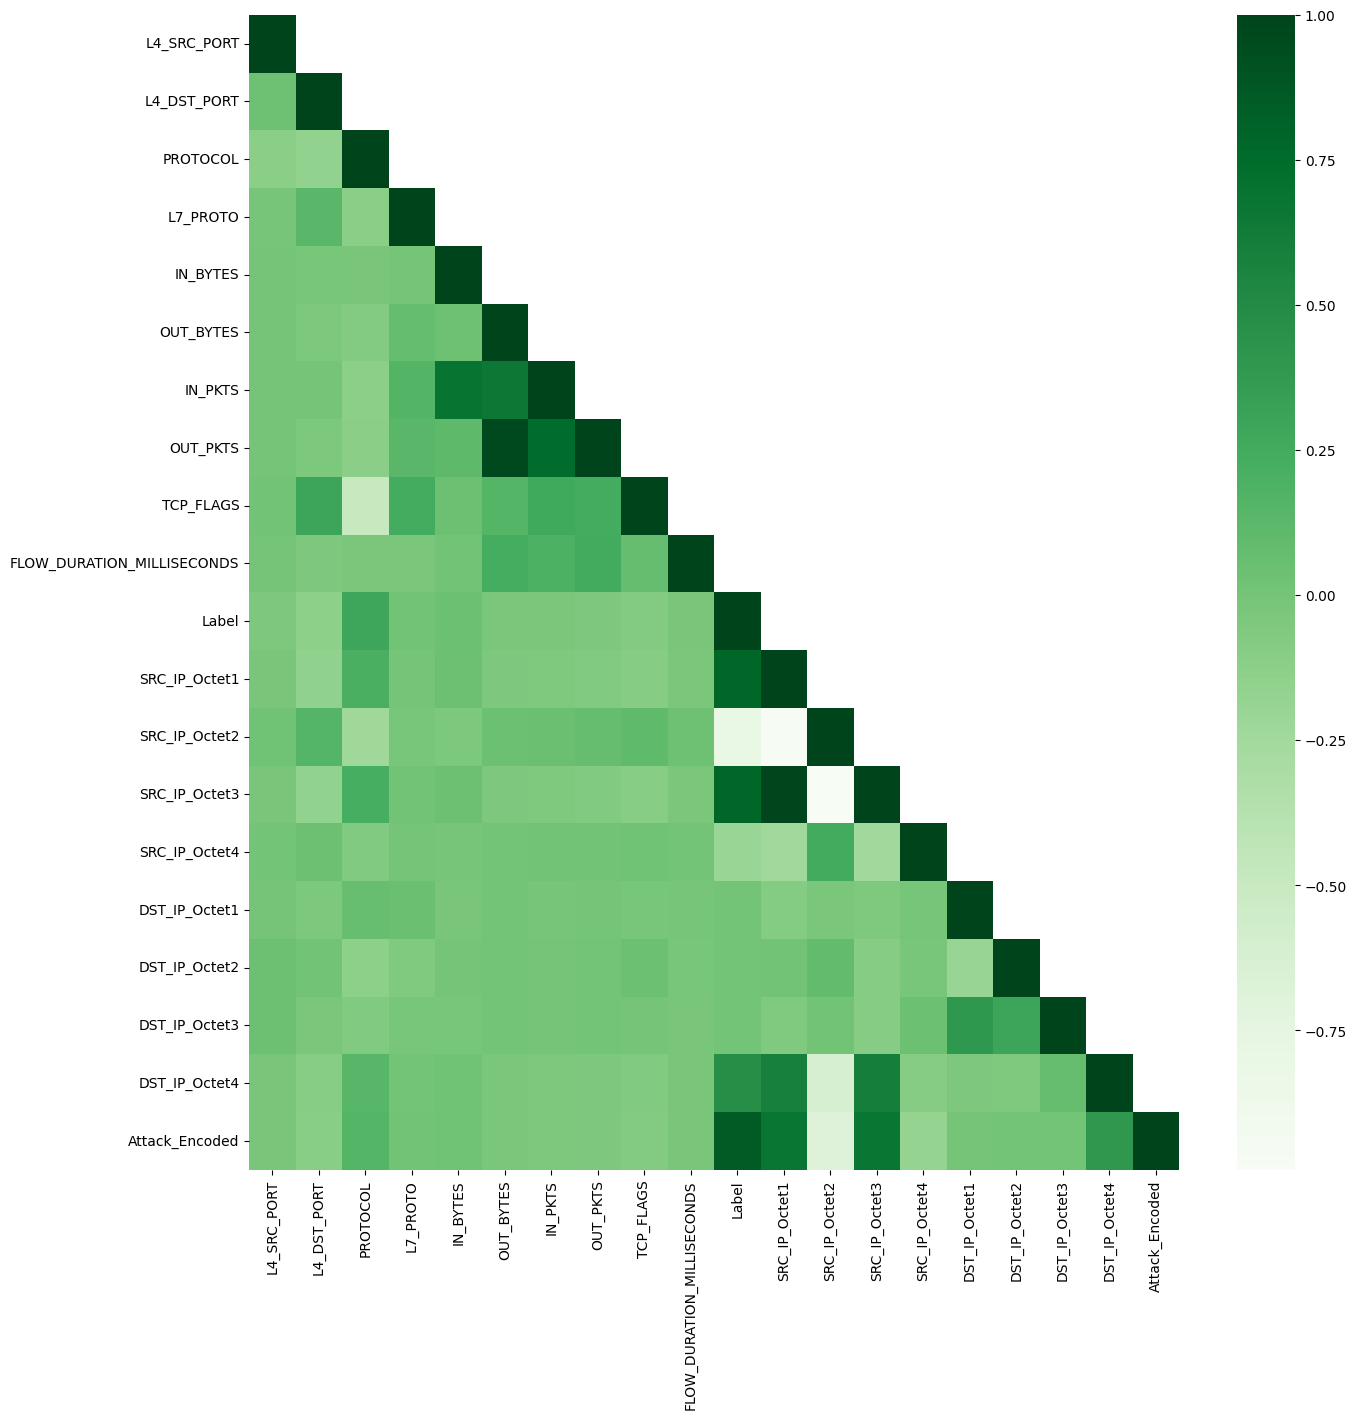

In [19]:
cor=df.corr()
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Greens')